[View in Colaboratory](https://colab.research.google.com/github/Jurk06/data-driven-challenge/blob/master/Dengue4.ipynb)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
test=pd.read_csv('dengue_features_test.csv')


In [6]:
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [0]:
train=pd.read_csv('dengue_labels_train.csv')

In [0]:
traain=pd.read_csv('dengue_features_train.csv')

In [0]:
traain.fillna(traain.mean(), inplace=True)

In [0]:
test.fillna(test.mean(), inplace=True)

In [0]:
submission=pd.read_csv('submission_format.csv')

In [0]:
df=pd.merge(traain, train)

In [13]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [18]:
pd.to_datetime(df['week_start_date']).head()

0   1990-04-30
1   1990-05-07
2   1990-05-14
3   1990-05-21
4   1990-05-28
Name: week_start_date, dtype: datetime64[ns]

In [19]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [20]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

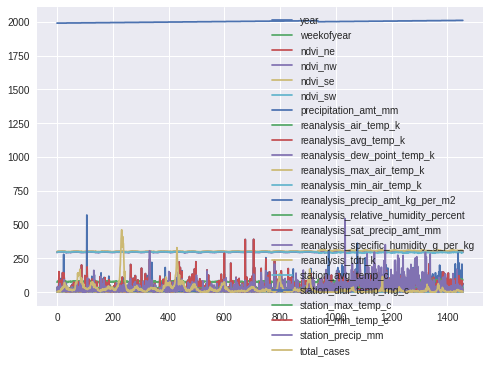

In [21]:
df.plot()

In [0]:
x=df[df['city']=='sj']

In [29]:
x.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [30]:
x.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [32]:
pd.to_datetime(x['week_start_date'])

0     1990-04-30
1     1990-05-07
2     1990-05-14
3     1990-05-21
4     1990-05-28
5     1990-06-04
6     1990-06-11
7     1990-06-18
8     1990-06-25
9     1990-07-02
10    1990-07-09
11    1990-07-16
12    1990-07-23
13    1990-07-30
14    1990-08-06
15    1990-08-13
16    1990-08-20
17    1990-08-27
18    1990-09-03
19    1990-09-10
20    1990-09-17
21    1990-09-24
22    1990-10-01
23    1990-10-08
24    1990-10-15
25    1990-10-22
26    1990-10-29
27    1990-11-05
28    1990-11-12
29    1990-11-19
         ...    
906   2007-10-01
907   2007-10-08
908   2007-10-15
909   2007-10-22
910   2007-10-29
911   2007-11-05
912   2007-11-12
913   2007-11-19
914   2007-11-26
915   2007-12-03
916   2007-12-10
917   2007-12-17
918   2007-12-24
919   2008-01-01
920   2008-01-08
921   2008-01-15
922   2008-01-22
923   2008-01-29
924   2008-02-05
925   2008-02-12
926   2008-02-19
927   2008-02-26
928   2008-03-04
929   2008-03-11
930   2008-03-18
931   2008-03-25
932   2008-04-01
933   2008-04-

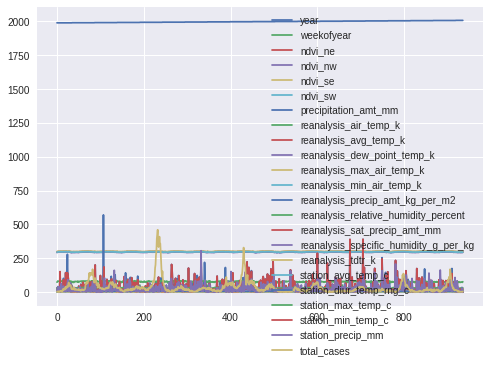

In [33]:
x.plot()

In [0]:
x.set_index(x['week_start_date'], inplace=True)

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix

In [39]:
x.values

array([['sj', 1990, 18, ..., 20.0, 16.0, 4],
       ['sj', 1990, 19, ..., 22.2, 8.6, 5],
       ['sj', 1990, 20, ..., 22.8, 41.4, 4],
       ...,
       ['sj', 2008, 15, ..., 21.7, 30.7, 1],
       ['sj', 2008, 16, ..., 21.7, 11.2, 3],
       ['sj', 2008, 17, ..., 23.3, 0.3, 5]], dtype=object)

In [43]:
x.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

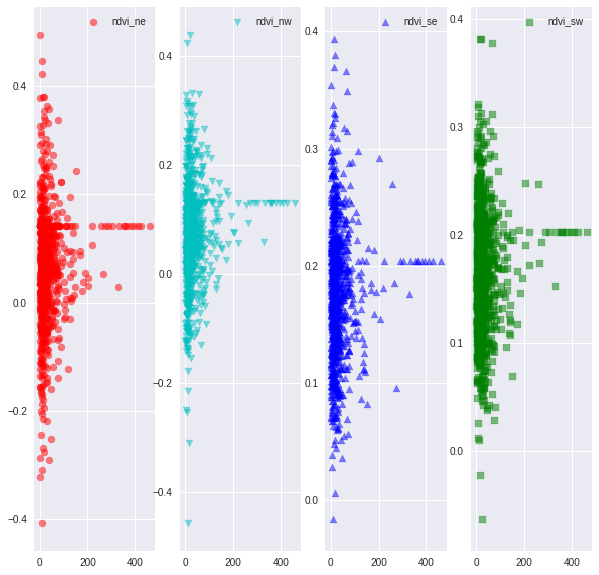

In [59]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.scatter(x=x['total_cases'], y=x['ndvi_ne'], alpha=0.5, c='r', marker='o')
plt.legend()

plt.subplot(1,4,2)
plt.scatter(x=x['total_cases'], y=x['ndvi_nw'],alpha=0.5, c='c',marker='v')
plt.legend()

plt.subplot(1,4,3)
plt.scatter(x=x['total_cases'], y=x['ndvi_se'],alpha=0.5, c='b',marker='^')
plt.legend()

plt.subplot(1,4,4)
plt.scatter(x=x['total_cases'], y=x['ndvi_sw'],alpha=0.5, c='g',marker='s')
plt.legend()
plt.show()



In [60]:
pd.to_datetime(x['year'])

week_start_date
1990-04-30   1970-01-01 00:00:00.000001990
1990-05-07   1970-01-01 00:00:00.000001990
1990-05-14   1970-01-01 00:00:00.000001990
1990-05-21   1970-01-01 00:00:00.000001990
1990-05-28   1970-01-01 00:00:00.000001990
1990-06-04   1970-01-01 00:00:00.000001990
1990-06-11   1970-01-01 00:00:00.000001990
1990-06-18   1970-01-01 00:00:00.000001990
1990-06-25   1970-01-01 00:00:00.000001990
1990-07-02   1970-01-01 00:00:00.000001990
1990-07-09   1970-01-01 00:00:00.000001990
1990-07-16   1970-01-01 00:00:00.000001990
1990-07-23   1970-01-01 00:00:00.000001990
1990-07-30   1970-01-01 00:00:00.000001990
1990-08-06   1970-01-01 00:00:00.000001990
1990-08-13   1970-01-01 00:00:00.000001990
1990-08-20   1970-01-01 00:00:00.000001990
1990-08-27   1970-01-01 00:00:00.000001990
1990-09-03   1970-01-01 00:00:00.000001990
1990-09-10   1970-01-01 00:00:00.000001990
1990-09-17   1970-01-01 00:00:00.000001990
1990-09-24   1970-01-01 00:00:00.000001990
1990-10-01   1970-01-01 00:00:00.00000

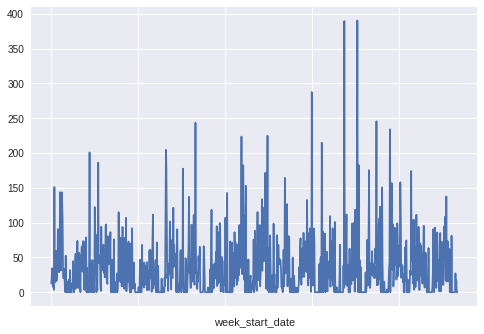

In [63]:
x['precipitation_amt_mm'].plot(kind='line')

In [0]:
x.set_index(x['year'], inplace=True)

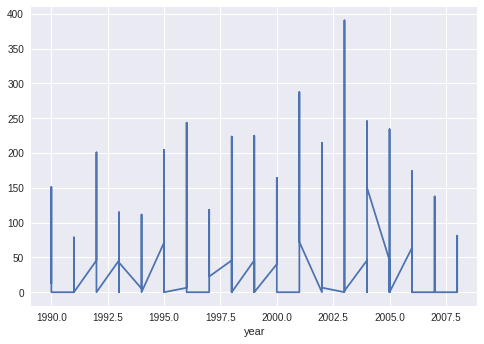

In [65]:
x['precipitation_amt_mm'].plot(kind='line')

In [66]:
x.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

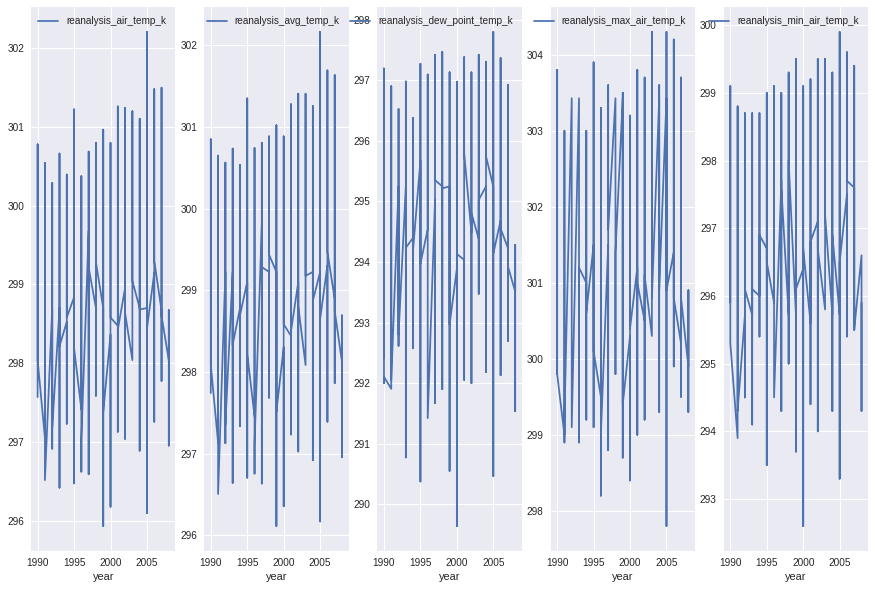

In [73]:
plt.figure(figsize=(15,10))
plt.subplot(1,5,1)
x['reanalysis_air_temp_k'].plot(kind='line')
plt.legend()
plt.subplot(1,5,2)
x['reanalysis_avg_temp_k'].plot(kind='line')
plt.legend()
plt.subplot(1,5,3)
x['reanalysis_dew_point_temp_k'].plot(kind='line')
plt.legend()
plt.subplot(1,5,4)
x['reanalysis_max_air_temp_k'].plot(kind='line')
plt.legend()
plt.subplot(1,5,5)
x['reanalysis_min_air_temp_k'].plot(kind='line')
plt.legend()

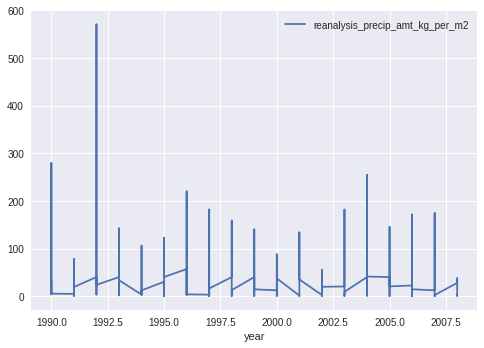

In [75]:
x['reanalysis_precip_amt_kg_per_m2'].plot(kind='line')
plt.legend()


In [76]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [0]:
feature_col=['city','week_start_date', 'total_cases']
X=df.drop(feature_col, axis=1)

In [78]:
X.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [80]:
df.shape

(1456, 25)

In [0]:
y=df.iloc[:,24]

In [84]:
X.shape

(1456, 22)

In [85]:
y.shape

(1456,)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 22 columns):
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip_amt_kg_per_m2          1456 non-null float64
reanalysis_relative_humidity_percent     1456 non-null float64
reanalysis_sat_

In [105]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.10273973 0.06164384 0.03424658 0.07534247 0.0890411  0.07534247
 0.04827586 0.04137931 0.06206897 0.06206897]


In [106]:
np.mean(score)*100

6.521492678318374

In [102]:
clf.predict(X)

array([4, 6, 6, ..., 1, 1, 0])

In [107]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.10958904 0.08219178 0.06849315 0.0890411  0.06849315 0.10958904
 0.08275862 0.05517241 0.06206897 0.07586207]


In [108]:
np.mean(score)*100

8.0325932923949

In [110]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.11643836 0.08219178 0.10273973 0.10958904 0.09589041 0.0890411
 0.08275862 0.08275862 0.08965517 0.06896552]


In [111]:
np.mean(score)*100

9.200283419933868

In [113]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.07534247 0.08219178 0.04794521 0.06164384 0.05479452 0.0890411
 0.06206897 0.04827586 0.08965517 0.07586207]


In [114]:
np.mean(score)*100

6.868209730751063

In [115]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.06849315 0.06849315 0.06164384 0.06849315 0.06164384 0.07534247
 0.06206897 0.04827586 0.06896552 0.08965517]


In [116]:
np.mean(score)*100

6.730751062824751

use Decision Tree

In [118]:
test.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [0]:
feature_col=['city','week_start_date']
test=test.drop(feature_col, axis=1)


In [120]:
test.shape

(416, 22)

In [0]:
clf=SVC()
clf.fit(X, y)

pred=clf.predict(test)


In [0]:
submission = pd.DataFrame({
        "total": pred
})

submission.to_csv('submission_format.csv', index=False)


In [126]:
submission = pd.read_csv('submission_format.csv')
submission.head()

,total
0,0
1,0
2,0
3,0
4,0
